# 0.0 IMPORTS

In [9]:
import seaborn as sns
import pandas as pd

import inflection
import datetime 

from IPython.core.display    import HTML

## 0.1 Helper Functions

In [10]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

In [11]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [12]:
df_raw = pd.read_csv('data/kc_house_data.csv')

In [13]:
df_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 1.0 Data Description

In [14]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [15]:
cols_old = df1.columns.values

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map (snakecase, cols_old))

#rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [16]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 21613
Number of Columns: 21


## 1.3 Check NA 

In [17]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Check Data Types

In [18]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.5 Change Type

In [21]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.6 Descriptive Statistics

In [22]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## 1.7 Numerical Attributes

In [23]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


C:\Users\AMD\anaconda3\envs\houserocket\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

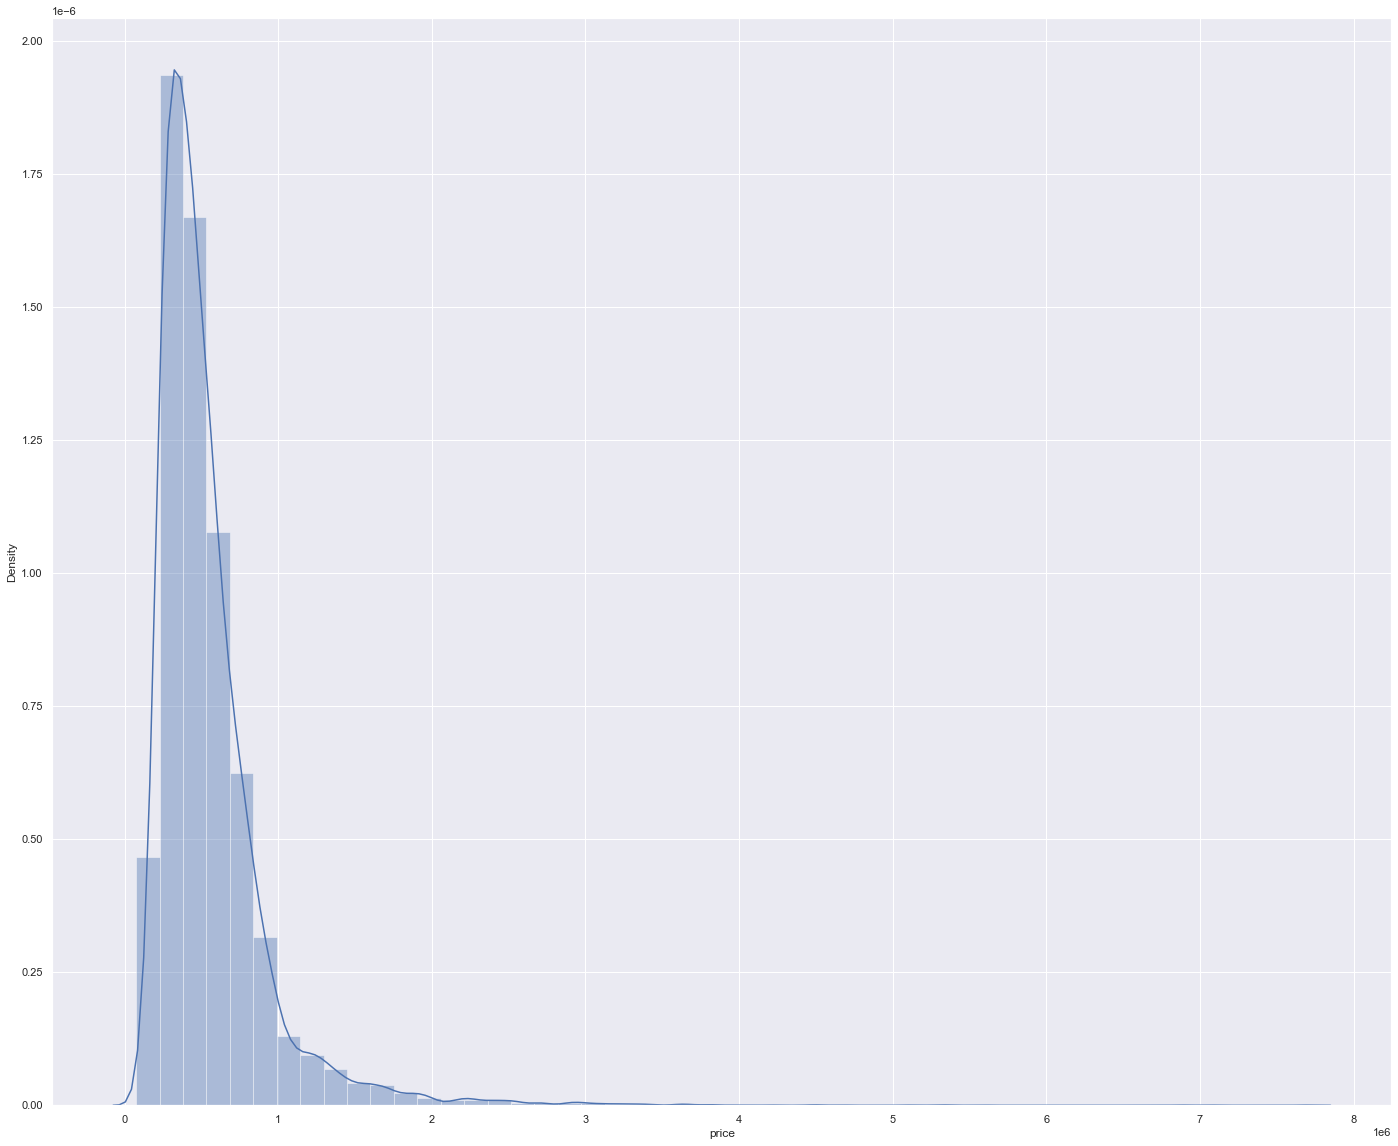

In [24]:
import seaborn as sns

sns.distplot(df1['price'])

<AxesSubplot:>

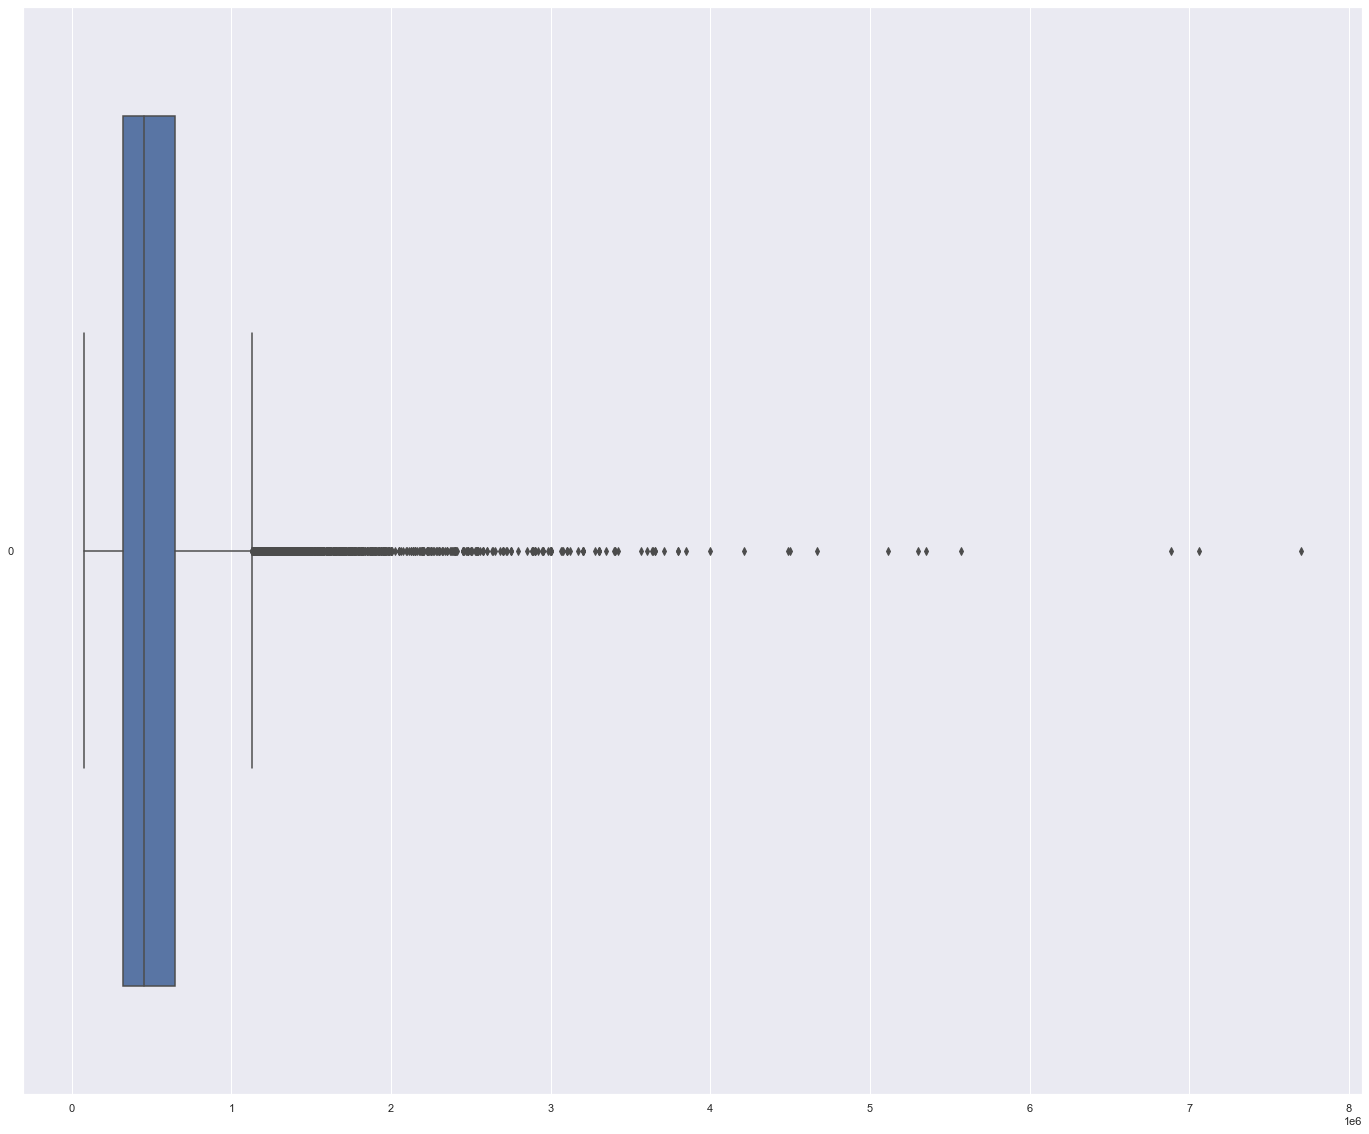

In [25]:
sns.boxplot(data=df1['price'], orient='h')

## 1.8 Categorical Attributes

## 2.0 FEATURE ENGINEERING

In [372]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipoteses

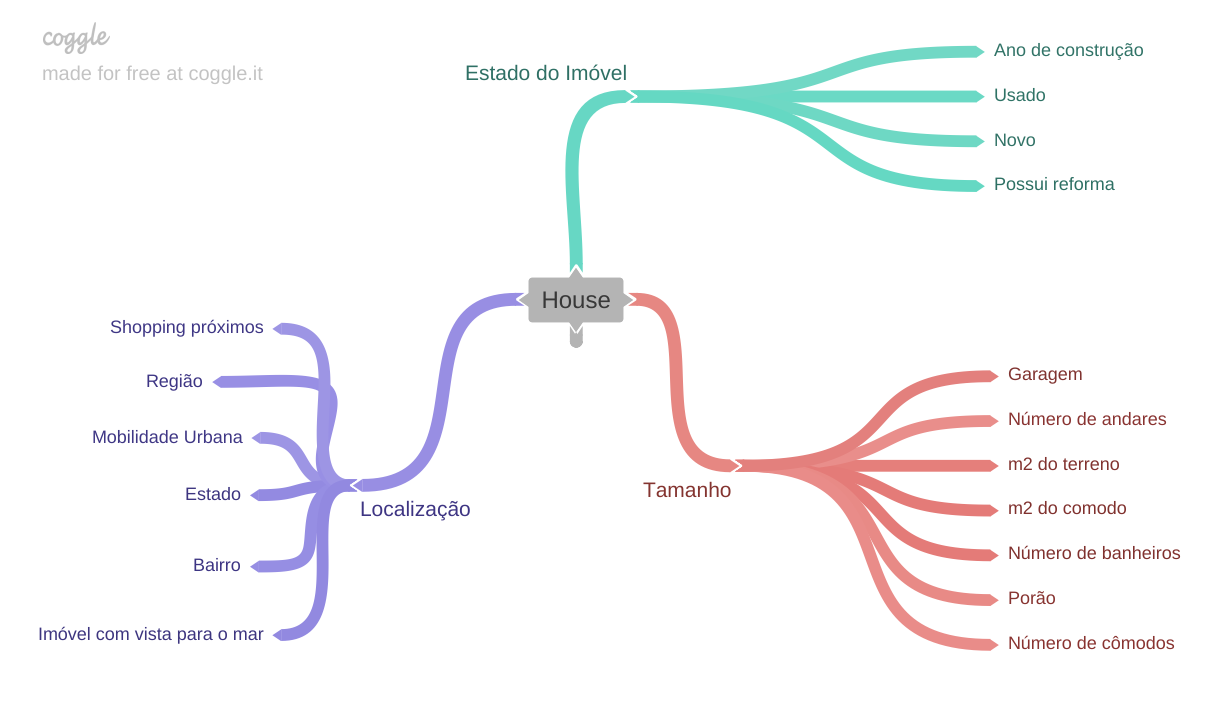

In [373]:
from IPython.core.display    import Image
Image('img/MindMapHipothesis.png')

## 2.2 Hipotese Tamanho

**H1**. Imóveis deveriam ser mais caros de acordo com a quantidade de andares.

**H2**. Imóveis deveriam ser mais caros de acordo com a quantidade de banheiros.

**H3**. Imóveis que possuem porão deveriam ser mais caros.

**H4**. Imóveis deveriam ser mais caros de acordo com a capacidade de automoveis da garagem.

## 2.3 Hipotese Localização

**H1**. Imóveis deveriam ser mais caros de acordo com a cidade.

**H2**. Imóveis deveriam ser mais caros de acordo com o bairro.

**H3**. Imóveis deveriam ser mais caros de acordo com a região.

**H4**. Imóveis deveriam ser mais caros se possuirem shopping próximos.

**H5**. Vista para o mar deveria aumentar o valor do imóvel em 10%.

## 2.4 Hipotese Estado do Imóvel

**H1**. Quanto mais velho o imóvel mais caro ele deveria ser.

**H2**. Imóveis que foram reformados são mais baratos.

**H3**. Imóveis novos não são mais caros que os imoveis antigos

## 2.5 Lista Final de Hipóteses

**H1**. Imóveis deveriam ser mais caros de acordo com a quantidade de andares.

**H2**. Imóveis deveriam ser mais caros de acordo com a quantidade de banheiros.

**H3**. Imóveis que possuem porão deveriam ser mais caros.

**H4**. Imóveis deveriam ser mais caros de acordo com a capacidade de automoveis da garagem.

**H5**. Imóveis deveriam ser mais caros de acordo com a cidade.

**H6**. Imóveis deveriam ser mais caros de acordo com o bairro.

**H7**. Imóveis deveriam ser mais caros de acordo com a região.

**H8**. Imóveis deveriam ser mais caros se possuirem shopping próximos.

**H9**. Vista para o mar deveria aumentar o valor do imóvel em 10%.

**H10**. Quanto mais velho o imóvel mais caro ele deveria ser.

**H11**. Imóveis que foram reformados são mais baratos.

**H12**. Imóveis novos não são mais caros que os imoveis antigos.

## 2.6 Feature Engenering

In [374]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# median price by zipcode
df = df2[['price', 'zipcode']].groupby('zipcode').median().reset_index().rename(columns={'price': 'median_price'})
df2 = df2.merge(df, on='zipcode', how='inner')

# status 
df2['status'] = 0
for i in range(len( df2 ) ):
        if  (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'condition'] >= 2):
             df2.loc[i, 'status'] = 'compra'
        else:
            df2.loc[i, 'status'] = 'não_compra'

# seasonality
df2['seasonality'] = 0
for i in range( len ( df2 ) ):
    if (df2.loc[i, 'month'] >= 1) & (df2.loc[i, 'month'] < 3):
        df2.loc[i, 'seasonality'] = 'inverno'
    
    elif (df2.loc[i, 'month'] >= 3) & (df2.loc[i, 'month'] < 6):
        df2.loc[i, 'seasonality'] = 'primavera'
     
    elif (df2.loc[i, 'month'] >= 6) & (df2.loc[i, 'month'] < 9):
        df2.loc[i, 'seasonality'] = 'verão'
        
    elif (df2.loc[i, 'month'] >= 9) & (df2.loc[i, 'month'] < 12):
        df2.loc[i, 'seasonality'] = 'outono'
        
    else:    
        df2.loc[i, 'seasonality'] = 'outono'

# resale
for i in range ( len ( df2 ) ):
    
    if (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'seasonality'] == 'primavera'):
        df2.loc[i, 'resale_price'] = (0.30 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']
        
    elif (df2.loc[i, 'price'] < df2.loc[i, 'median_price']) & (df2.loc[i, 'seasonality'] == 'verão'):
        df2.loc[i, 'resale_price'] = (0.20 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']
    
    else:
        df2.loc[i, 'resale_price'] = (0.10 *  df2.loc[i, 'median_price']) + df2.loc[i, 'median_price']

# profit
df2['profit'] = df2['resale_price'] - df2['price']

In [388]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,median_price,status,seasonality,resale_price,profit
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,278277.0,compra,outono,306104.7,84204.7
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,2014,6,23,278277.0,compra,verão,333932.4,128507.4
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,2014,7,17,278277.0,não_compra,verão,306104.7,-138895.3
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,2014,9,25,278277.0,compra,outono,306104.7,70104.7
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,2015,2,27,278277.0,compra,inverno,306104.7,136104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.0,4,3.25,3990,18115,2.0,0,0,4,11,3990,0,1989,0,98039,47.6177,-122.229,3450,16087,2014,10,3,1892500.0,não_compra,outono,2081750.0,-638250.0
21609,2525049113,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,4,10,4065,0,1987,0,98039,47.6209,-122.237,3070,18713,2014,7,25,1892500.0,não_compra,verão,2081750.0,131750.0
21610,3262300485,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,0,3,11,3410,0,2006,0,98039,47.6295,-122.236,3410,16236,2015,4,21,1892500.0,não_compra,primavera,2081750.0,-168250.0
21611,6447300365,2014-11-13,2900000.0,5,4.00,5190,14600,2.0,0,1,3,11,5190,0,2013,0,98039,47.6102,-122.225,3840,19250,2014,11,13,1892500.0,não_compra,outono,2081750.0,-818250.0
